In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean


In [59]:
df = pd.read_csv('../data/communities.csv')
df.head()
#df.shape
#df['PolicCars'].value_counts() tiene 1675 datos NaN (?) no puede entrar
#df['PctUsePubTrans'].value_counts()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,Unnamed: 128
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,NaN
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.12,0.45,?,?,?,?,0.00,?,0.67,NaN
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.21,0.02,?,?,?,?,0.00,?,0.43,NaN
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.39,0.28,?,?,?,?,0.00,?,0.12,NaN
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.09,0.02,?,?,?,?,0.00,?,0.03,NaN


In [60]:
df1 = df.drop(['Unnamed: 128'], axis=1)
df1.columns

Index(['state', 'county', 'community', 'communityname', 'fold', 'population',
       'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

In [90]:
# convertir
df1.replace(to_replace = '?', value = np.NaN, inplace = True)
#df1.head()
#df1['PolicCars'].value_counts()
#df1['PolicCars'].isnull().sum()
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df_vars = missing_data[missing_data['Percent']==0]
nombres = df_vars.index.tolist()
nombres = np.sort(nombres)
print(nombres)
#df_vars.reindex(index=df_vars.index[::-1])
#print(df_vars)
#df_vars.columns

#df.index.tolist()
#data.reindex(index=data.index[::-1])
# ver variable dependiente "y" y tambien independientes


['AsianPerCap' 'FemalePctDiv' 'HispPerCap' 'HousVacant' 'LandArea'
 'LemasPctOfficDrugUn' 'MalePctDivorce' 'MalePctNevMarr' 'MedNumBR'
 'MedOwnCostPctInc' 'MedOwnCostPctIncNoMtg' 'MedRent' 'MedRentPctHousInc'
 'MedYrHousBuilt' 'NumIlleg' 'NumImmig' 'NumInShelters' 'NumStreet'
 'NumUnderPov' 'OwnOccHiQuart' 'OwnOccLowQuart' 'OwnOccMedVal'
 'PctBSorMore' 'PctBornSameState' 'PctEmplManu' 'PctEmplProfServ'
 'PctEmploy' 'PctFam2Par' 'PctForeignBorn' 'PctHousLess3BR'
 'PctHousNoPhone' 'PctHousOccup' 'PctHousOwnOcc' 'PctIlleg'
 'PctImmigRec10' 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRecent'
 'PctKids2Par' 'PctLargHouseFam' 'PctLargHouseOccup' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctNotSpeakEnglWell' 'PctOccupManu' 'PctOccupMgmtProf'
 'PctPersDenseHous' 'PctPersOwnOccup' 'PctPopUnderPov' 'PctRecImmig10'
 'PctRecImmig5' 'PctRecImmig8' 'PctRecentImmig' 'PctSameCity85'
 'PctSameHouse85' 'PctSameState85' 'PctSpeakEnglOnly' 'PctTeen2Par'
 'PctUnemployed' 'PctUsePubTrans' 'PctVacMore6Mos' 'PctVacantBoa

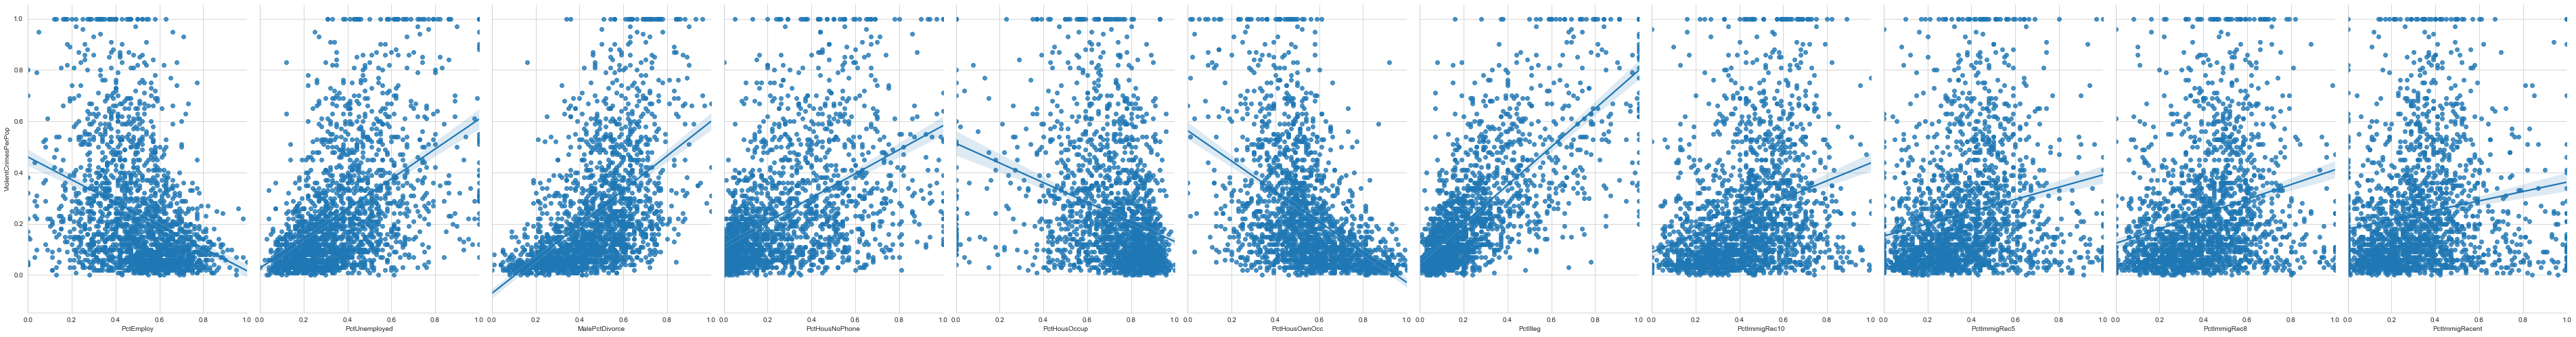

In [128]:
nombres_varind = ['PctEmploy','PctUnemployed','MalePctDivorce','PctHousNoPhone','PctHousOccup','PctHousOwnOcc','PctIlleg',
 'PctImmigRec10','PctImmigRec5','PctImmigRec8','PctImmigRecent']
sns.pairplot(df1, x_vars=nombres_varind, y_vars='ViolentCrimesPerPop', size=7, aspect=0.7, kind='reg')


In [129]:
X = df1[nombres_varind]
y = df1['ViolentCrimesPerPop']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [131]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
print(linreg.intercept_)
print(linreg.coef_)

-0.08700606638502956
[-0.01449759  0.13242902  0.28221245 -0.07495342 -0.08945301  0.07223136
  0.59510579  0.19903173 -0.07905768 -0.01448901 -0.00215032]


In [133]:
zip(nombres_varind, linreg.coef_)

In [134]:
# predicción
y_pred = linreg.predict(X_test)

In [136]:
# calculate MAE using scikit-learn
print('Error absoluto medio:', mean_absolute_error(y_test, y_pred))
# calculate MSE using scikit-learn
print('Error cuadratico medio:', mean_squared_error(y_test, y_pred))
# coef de determinacion
print('coeficiente de determinación: ',r2_score(y_test, y_pred))

Error absoluto medio: 0.1015453142590035
Error cuadratico medio: 0.02192969172043635
coeficiente de determinación:  0.5805443507473425


In [138]:
# ver si los residuos tienen distribucion normal

